# How do socioeconomic factors affect crime in different neighborhoods in Baltimore?

## Introduction
This project seeks to explore the complex relationship between socioeconomic factors and crime rates across various neighborhoods in Baltimore. Utilizing data from January 1, 2012, to September 1, 2017, this analysis aims to uncover how variables such as income level, employment status, and education influence the prevalence and types of crimes committed in different areas of the city. Baltimore, with its diverse range of neighborhoods, presents a unique opportunity to examine the socioeconomic underpinnings of crime. By correlating crime data with socioeconomic indicators, this project seeks to provide insights into the patterns and causes of crime, offering a nuanced understanding that can inform policy decisions and interventions. This investigation is grounded in the belief that a deeper understanding of the economic and social conditions contributing to crime can lead to more effective and equitable solutions for enhancing urban safety and community well-being.

The dataset used in this project was downloaded from [Kaggle](https://www.kaggle.com/datasets/sohier/crime-in-baltimore/data) and originially sourced from Open Baltimore's database of victim-based crimes. It contains data on every victim-based crime reported in Baltimore from January 1, 2012, to September 1, 2017. Each row contains information on the time, location, and details of a crime.

For Project One, we do not have access to socioeconomic data, as we are restricted to our one dataset. However, this project will make strides towards answering the broader research question by making observations about the frequency of violent and property crime in urban and suburban neighborhoods of Baltimore over time.

The independent variables in this project are 'CrimeDate' and 'DowntownStatus'. 'CrimeDate' will help analyze how crime rates interact with socioeconomic factors, as it will allow us to compare the crime level and economy conditions at a given point in time. 'Downtown' will be our proxy for neighborhood, dividing the city into its downtown core (the Central, Western and Eastern districts) and the suburbs, using data from the 'District' column. This will allow us to make observations about how socioeconomic factors affect urban and suburban neighborhoods differently.
Our dependent variable 'ViolentOrPropCrime' will allow us to see how socioeconomic factors effect the frequency of violent crime and property crime in different areas. This column will be formed based on data from the 'Description' column. In this project, we will be focused on identifying trends in the frequencies of each type of crime.

## Data Cleaning/Loading

In [82]:
# Loading libraries
import pandas as pd
import numpy as np

# Loading in dataset
df = pd.read_csv("/Users/ivangrandov/Downloads/BPD_Part_1_Victim_Based_Crime_Data.csv")
print(df.head())


    CrimeDate CrimeTime CrimeCode           Location          Description  \
0  09/02/2017  23:30:00       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE   
1  09/02/2017  23:00:00        7A  800 NEWINGTON AVE           AUTO THEFT   
2  09/02/2017  22:53:00        9S      600 RADNOR AV             SHOOTING   
3  09/02/2017  22:50:00        4C     1800 RAMSAY ST         AGG. ASSAULT   
4  09/02/2017  22:31:00        4E       100 LIGHT ST       COMMON ASSAULT   

  Inside/Outside   Weapon   Post  District      Neighborhood  Longitude  \
0              I    KNIFE  913.0  SOUTHERN          Brooklyn  -76.60541   
1              O      NaN  133.0   CENTRAL    Reservoir Hill  -76.63217   
2        Outside  FIREARM  524.0  NORTHERN    Winston-Govans  -76.60697   
3              I    OTHER  934.0  SOUTHERN  Carrollton Ridge  -76.64526   
4              O    HANDS  113.0   CENTRAL     Downtown West  -76.61365   

   Latitude                       Location 1     Premise  Total Incidents  
0  39.2295

In [83]:
# Drop columns we are not focusing on
cleaned_df = df.drop(columns=['CrimeTime','CrimeCode','Location','Inside/Outside','Weapon','Post','Neighborhood','Location 1','Premise','Total Incidents'])
# Check for missing values
cleaned_df.isnull().sum()/len(cleaned_df.index)

CrimeDate      0.000000
Description    0.000000
District       0.000289
Longitude      0.007970
Latitude       0.007970
dtype: float64

In [84]:
# Drop rows with missing values
cleaned_df.dropna(subset=['CrimeDate', 'Description', 'District', 'Longitude', 'Latitude'], inplace=True)
cleaned_df.isnull().sum()

CrimeDate      0
Description    0
District       0
Longitude      0
Latitude       0
dtype: int64

In [85]:
# Make a new column that categorizes crimes into violent or property crimes
def categorize_crime(description):
    # Define the categories for violent and property crimes
    violent_crimes = ['ROBBERY - RESIDENCE', 'SHOOTING', 'AGG. ASSAULT', 'COMMON ASSAULT', 'HOMICIDE', 'ROBBERY - STREET', 'ROBBERY - COMMERCIAL', 'ROBBERY - CARJACKING', 'ASSAULT BY THREAT', 'RAPE']
    property_crimes = ['AUTO THEFT', 'BURGLARY', 'LARCENY', 'LARCENY FROM AUTO', 'ARSON']
    
    # Check and categorize each crime description
    if description.upper() in violent_crimes:
        return 'Violent'
    elif description.upper() in property_crimes:
        return 'Property'
    else:
        return 'Other'  # Use 'Other' for crimes that do not fit into the above categories

# Apply the function to each row in the 'Description' column to create the new column
cleaned_df['ViolentOrPropCrime'] = cleaned_df['Description'].apply(categorize_crime)

# Make a new column that categorizes districts into downtown or not downtown.
def categorize_by_location(district):
    # Define the downtown districts
    downtown_districts = ['CENTRAL', 'WESTERN', 'EASTERN']
    if district in downtown_districts:
        return 'Downtown'
    else:
        return 'Not Downtown'

# Apply the function to the 'District' column to create a new column 'LocationCategory'
cleaned_df['DowntownStatus'] = cleaned_df['District'].apply(categorize_by_location)

# Standardize dating system to datetime format
cleaned_df['CrimeDate'] = pd.to_datetime(cleaned_df['CrimeDate'])

# Check cleaned data
print(cleaned_df.head())

   CrimeDate          Description  District  Longitude  Latitude  \
0 2017-09-02  ROBBERY - RESIDENCE  SOUTHERN  -76.60541  39.22951   
1 2017-09-02           AUTO THEFT   CENTRAL  -76.63217  39.31360   
2 2017-09-02             SHOOTING  NORTHERN  -76.60697  39.34768   
3 2017-09-02         AGG. ASSAULT  SOUTHERN  -76.64526  39.28315   
4 2017-09-02       COMMON ASSAULT   CENTRAL  -76.61365  39.28756   

  ViolentOrPropCrime DowntownStatus  
0            Violent   Not Downtown  
1           Property       Downtown  
2            Violent   Not Downtown  
3            Violent   Not Downtown  
4            Violent       Downtown  


## Summary Statistics

In [93]:
print(cleaned_df.describe(include=['object']), "\n")
print(cleaned_df.shape)

       Description      District ViolentOrPropCrime DowntownStatus
count       274322        274322             274322         274322
unique          15             9                  2              2
top        LARCENY  NORTHEASTERN           Property   Not Downtown
freq         60093         42709             166280         197421 

(274322, 7)


From January 1, 2012 to September 2, 2017, the most common crime committed in Baltimore was Larceny with 60093 out of 274322 (~21.9)instances. The district with the most crime was the Northeastern district, with 42709 crimes (~15.6%). The most common type of crime was property crime, with 166280 instances (~60.6%). Most crimes were committed outside of Baltimore's downtown core, with 197421 crimes (~72%) occuring elsewhere in the city.

In [87]:
# x1 variable (CrimeDate) value count
cleaned_df['CrimeDate'].value_counts()

2015-04-27    410
2016-06-05    255
2017-01-20    194
2016-09-24    192
2013-12-20    191
             ... 
2014-03-03     57
2015-03-05     54
2016-01-24     45
2014-02-13     44
2016-01-23     33
Name: CrimeDate, Length: 2072, dtype: int64

We see a huge outlier for crime on April 27, 2015, with a crime rate over 60% higher than the next highest date. A quick Google search led me to a [ABC news article](#https://abcnews.go.com/US/hundreds-people-clash-police-baltimore-mall/story?id=30622868) that mentions massive riots in the city following the killing of Freddie Gray by Baltimore Police Department.

In [88]:
# Analysis of crime on April 27, 2015
print(cleaned_df[cleaned_df['CrimeDate'] == '2015-04-27']['Description'].value_counts(), "\n")
print(cleaned_df[cleaned_df['CrimeDate'] == '2015-04-27']['ViolentOrPropCrime'].value_counts())

BURGLARY                207
AGG. ASSAULT             87
AUTO THEFT               31
LARCENY                  20
LARCENY FROM AUTO        14
ROBBERY - COMMERCIAL     13
COMMON ASSAULT           11
ARSON                    10
ROBBERY - STREET          8
ROBBERY - CARJACKING      6
ROBBERY - RESIDENCE       1
RAPE                      1
ASSAULT BY THREAT         1
Name: Description, dtype: int64 

Property    282
Violent     128
Name: ViolentOrPropCrime, dtype: int64


The majority of crime committed during the Freddie Gray riots on April 27, 2015 were property crimes, and the most common crimes were Burglary and Aggrevated Assault. This is an interesting observation, and can potentially be used in future research using police brutality incidences as a social factor for crime.

In [89]:
# Statistical distribution of x1 variable (CrimeDate)
cleaned_df['CrimeDate'].describe(datetime_is_numeric=True)

count                           274322
mean     2014-11-09 03:02:09.684093696
min                2012-01-01 00:00:00
25%                2013-06-05 00:00:00
50%                2014-11-07 00:00:00
75%                2016-04-30 00:00:00
max                2017-09-02 00:00:00
Name: CrimeDate, dtype: object

The mean and median date for crimes in Baltimore over our sample period are only two days apart, which tells us that the distribution of crime is not heavily skewed towards the beginning or end of our sample period. There are 540 days between the 50th and 75th percentile dates and there are 490 days between the 75th and 100th percentile dates, so crime between November 2014 and September 2017 is slightly skewed towards the end of the range. There are 521 days between the 0th and 25th percentile dates and there are 521 days between the 25th and 50th percentile dates, so crime between January 2012 and November 2014 is not skewed to either the beginning or end of the range.

In [103]:
# Datetime analysis of x2
print(cleaned_df[cleaned_df['DowntownStatus'] == 'Downtown']['CrimeDate'].describe(datetime_is_numeric=True), "\n")
print(cleaned_df[cleaned_df['DowntownStatus'] == 'Not Downtown']['CrimeDate'].describe(datetime_is_numeric=True))

count                            76901
mean     2014-11-01 08:43:44.922952704
min                2012-01-01 00:00:00
25%                2013-05-19 00:00:00
50%                2014-10-31 00:00:00
75%                2016-05-01 00:00:00
max                2017-09-02 00:00:00
Name: CrimeDate, dtype: object 

count                           197421
mean     2014-11-12 03:36:27.943532032
min                2012-01-01 00:00:00
25%                2013-06-11 00:00:00
50%                2014-11-09 00:00:00
75%                2016-04-30 00:00:00
max                2017-09-02 00:00:00
Name: CrimeDate, dtype: object


As mentioned before, over the sample period, most crimes were committed outside of Baltimore's downtown core, with 197421 crimes (~72%) occuring elsewhere in the city. The mean and median for downtown crime are only one day apart, so the distribution of crime is not skewed to the beginning or end of the sample period. The mean and median for non-downtown crime are only two days apart, so the distribution of crime is not skewed to the beginning or end of the sample period.

In [111]:
# y variable (Description) datetime analysis
print(cleaned_df[cleaned_df['ViolentOrPropCrime'] == 'Violent']['CrimeDate'].describe(datetime_is_numeric=True), "\n")
print(cleaned_df[cleaned_df['ViolentOrPropCrime'] == 'Property']['CrimeDate'].describe(datetime_is_numeric=True))

count                           108042
mean     2014-11-29 01:58:50.027212032
min                2012-01-01 00:00:00
25%                2013-05-29 00:00:00
50%                2014-12-11 00:00:00
75%                2016-06-12 00:00:00
max                2017-09-02 00:00:00
Name: CrimeDate, dtype: object 

count                           166280
mean     2014-10-27 03:50:14.231416832
min                2012-01-01 00:00:00
25%                2013-06-08 00:00:00
50%                2014-10-20 00:00:00
75%                2016-03-28 00:00:00
max                2017-09-02 00:00:00
Name: CrimeDate, dtype: object


The mean date for violent crime is 11 days earlier than the median date, so the distribution of violent crime is slightly skewed towards the beginning of the sample period. This implies slightly more violent crime occured towards the beginning of the sample period than the end.
The mean date for property crime is 7 days later than the median date, so the distribution of property crime is slightly skewed towards the end of the samples period. This implies slightly more property crime occured towards the end of the sample period than the beginning.

In [108]:
# Frequency of y at different x2 values
print(cleaned_df[cleaned_df['DowntownStatus'] == 'Downtown']['ViolentOrPropCrime'].describe(), "\n")
print(cleaned_df[cleaned_df['DowntownStatus'] == 'Not Downtown']['ViolentOrPropCrime'].describe())

count        76901
unique           2
top       Property
freq         42850
Name: ViolentOrPropCrime, dtype: object 

count       197421
unique           2
top       Property
freq        123430
Name: ViolentOrPropCrime, dtype: object


The most common type of crime in downtown Baltimore is property crime, with 42850 out of 76901 (~55.7%) crimes being property crimes.
The most common type of crime in non-downtwon Baltimore is also property crime, with 123430 out of 197421 (~62.5%) crimes being property crimes.
Non-downtown Baltimore has a higher percentage of its crime being property crime than downtown Baltimore. In future research, we will attempt to find explanatory factors for this discrepancy.

In [109]:
# Frequency of x2 at different y values
print(cleaned_df[cleaned_df['ViolentOrPropCrime'] == 'Violent']['DowntownStatus'].describe(), "\n")
print(cleaned_df[cleaned_df['ViolentOrPropCrime'] == 'Property']['DowntownStatus'].describe())

count           108042
unique               2
top       Not Downtown
freq             73991
Name: DowntownStatus, dtype: object 

count           166280
unique               2
top       Not Downtown
freq            123430
Name: DowntownStatus, dtype: object


Over the sample period, ~68.5% of violent crimes and ~74.2% of property crimes in Baltimore occured outside the downtown core. Both violent crime and property crime were more likely to occur outside of downtown. In future research, we can use population data for to find frequency per capita, which will help us draw more meaningful insights about the rates of each type of crime.

In [123]:
def aggregate_crimes_monthly(df, status):
    # Filter based on DowntownStatus
    filtered_df = df[df['DowntownStatus'] == status]
    # Group by month and ViolentOrPropCrime, then count occurrences
    return filtered_df.groupby([pd.Grouper(key='CrimeDate', freq='M'), 'ViolentOrPropCrime']).size().unstack().fillna(0)

# Aggregate for Downtown and Elsewhere with monthly data
downtown_crimes_monthly = aggregate_crimes_monthly(cleaned_df, 'Downtown')
elsewhere_crimes_monthly = aggregate_crimes_monthly(cleaned_df, 'Not Downtown')

# Data Visualization

In [133]:
# Import libraries
import matplotlib.pyplot as plt

# Aggregate counts by date (monthly) for each category and location
def aggregate_crimes_monthly(df, status):
    # Filter based on DowntownStatus
    filtered_df = df[df['DowntownStatus'] == status]
    # Group by month and ViolentOrPropCrime, then count occurrences
    return filtered_df.groupby([pd.Grouper(key='CrimeDate', freq='M'), 'ViolentOrPropCrime']).size().unstack().fillna(0)

# Aggregate for Downtown and Elsewhere with monthly data
downtown_crimes_monthly = aggregate_crimes_monthly(cleaned_df, 'Downtown')
elsewhere_crimes_monthly = aggregate_crimes_monthly(cleaned_df, 'Not Downtown')
# Exclude September 2017 because it contains incomplete data that would skew the graph
downtown_crimes_monthly = downtown_crimes_monthly.loc[(downtown_crimes_monthly.index != '2017-09-30')]
elsewhere_crimes_monthly = elsewhere_crimes_monthly.loc[(elsewhere_crimes_monthly.index != '2017-09-30')]

# Plotting function
def plot_crimes(df, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Violent'], label='Violent Crimes', marker='o', linestyle='-', markersize=5)
    plt.plot(df.index, df['Property'], label='Property Crimes', marker='x', linestyle='-', markersize=5)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

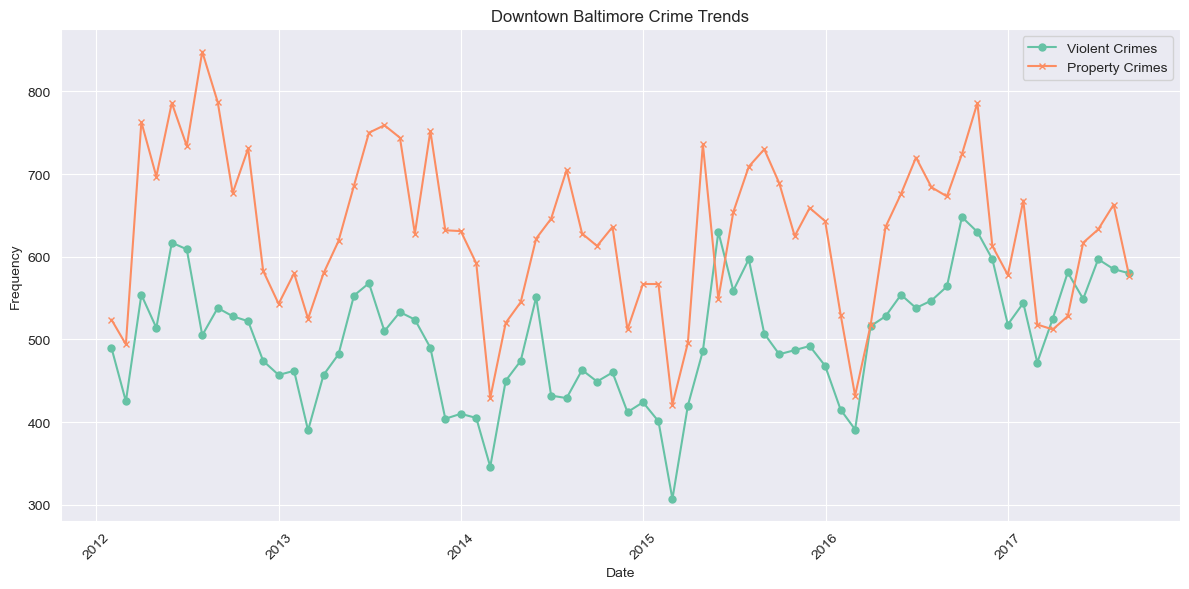

In [134]:
plot_crimes(downtown_crimes_monthly, 'Downtown Baltimore Crime Trends')

This graph displays the frequency of violent and property crimes in Downtown Baltimore over the sample period. To improve readibility, I aggregated the data monthly and set the bounds from 300 to 850. The datapoint for the number of crimes in a given month is plotted on the last day of that month. I excluded the data for September 2017 because there were only entries for the first two days of the month, which made the data point for September 2017 unusable.

In general, the graph shows a seasonal pattern in violent and property crimes in downtown Baltimore. Violent crimes tends to peak in the late spring to early summer and are usually at their lowest in the late winter. However, this trend did not follow in 2016, as violent crime peaked in late summer to early fall. Property crime also tends to be at its lowest in late winter, but tends to peak later in late summer to early fall. The similarity in these seasonal trends suggests that property and violent crime share causal many factors.

We can observe the Freddie Gray riots as the property crime spike in April 2015. This spike is an outlier to the typical trend of property crime peaking in late summer. This suggest other such outliers may be caused by major events or policy changes, rather than a change in the typical seasonal factors.

We can observe overall crime levels decreasing from 2012 to 2014, then increasing thereafter. This trend is potentially explained by major socioeconomic trends over the time period.

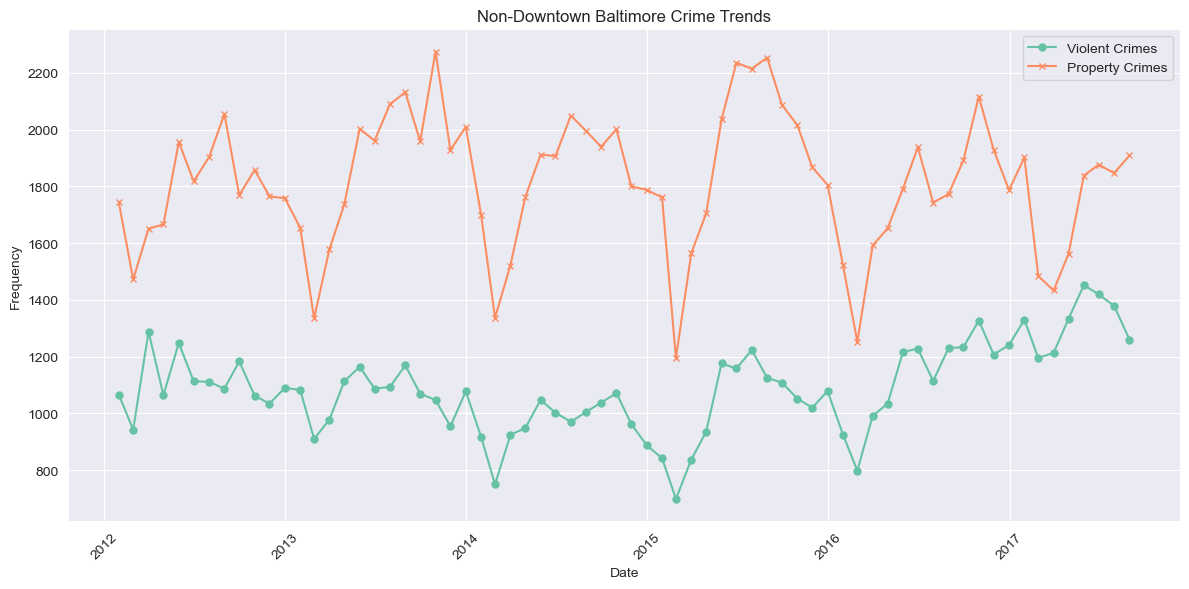

In [136]:
plot_crimes(elsewhere_crimes_monthly, 'Suburban Baltimore Crime Trends')

This graph displays the frequency of violent and property crimes in Suburban (Non-Downtown) Baltimore over the sample period. Like Downtown Baltimore, property crime in Suburban Baltimore follows a seasonal pattern. Property crime tends to peak in the summer to early fall and be at its lowest in late winter. However, violent crime's seasonal pattern is weaker. 2013, 2014, and 2015 show a seasonal pattern of peaks in the summer and early fall and low points in the late winter, but this trend does not follow for 2012 or 2017, where peaks were earlier in the year. This suggests that the factors that affect crime impact violent crime and property crime differently in suburban Baltimore.
We can also observe that the difference between property crime and violent crime is much greater in the suburbs than in downtown Baltimore.



# Conclusion
The analysis of crime trends in Baltimore, focusing on the distinction between Downtown and Non-Downtown areas, reveals significant insights into the dynamics of violent and property crimes across different urban landscapes. We identified seasonal trends in both types of crime and in both types of neighborhoods, which gives us valuable insight into the socioeconomic trends that influence these crime rates. The comparison between these areas underscores the variability in crime rates, with Downtown Baltimore exhibiting distinct patterns that potentially reflect the unique socio-economic and environmental factors inherent to densely populated commercial hubs. Notably, the trends indicate that while certain types of crimes may fluctuate seasonally, underlying factors such as major political movements, policy changes, and current events play crucial roles in shaping these patterns over time. The distinction between violent and property crimes furthers our understanding of how different drivers may influence various types of criminal activity in urban settings.

The findings of this study underscore the importance of targeted interventions and policies that address the specific needs and challenges of Downtown and Non-Downtown areas. For Downtown Baltimore, strategies that enhance surveillance, community policing, and socio-economic development could be pivotal in mitigating crime rates, particularly given the area's significance to the city's overall vitality. Meanwhile, addressing Non-Downtown crime requires a nuanced approach that considers the residential nature of these areas, focusing on building community initiatives that create safe environments. By leveraging detailed crime data and analytical insights, policymakers and community leaders can better allocate resources and evaluate the effectiveness of strategies to enhance public safety and community well-being across Baltimore.




